<a href="https://colab.research.google.com/github/vishnubongoni/Multi_linear_Regression/blob/main/Multi_Linear_Regression_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data=pd.read_csv("50_Startups.csv")
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.shape

(50, 5)

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'Mars'},axis=1)
data1.head(10)

,RDS,ADS,Mars,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


CORRELATION ANALYSIS

In [ ]:
data1.corr()

<ipython-input-7-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,ADS,Mars,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADS,0.241955,1.000000,-0.032154,0.200717
Mars,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


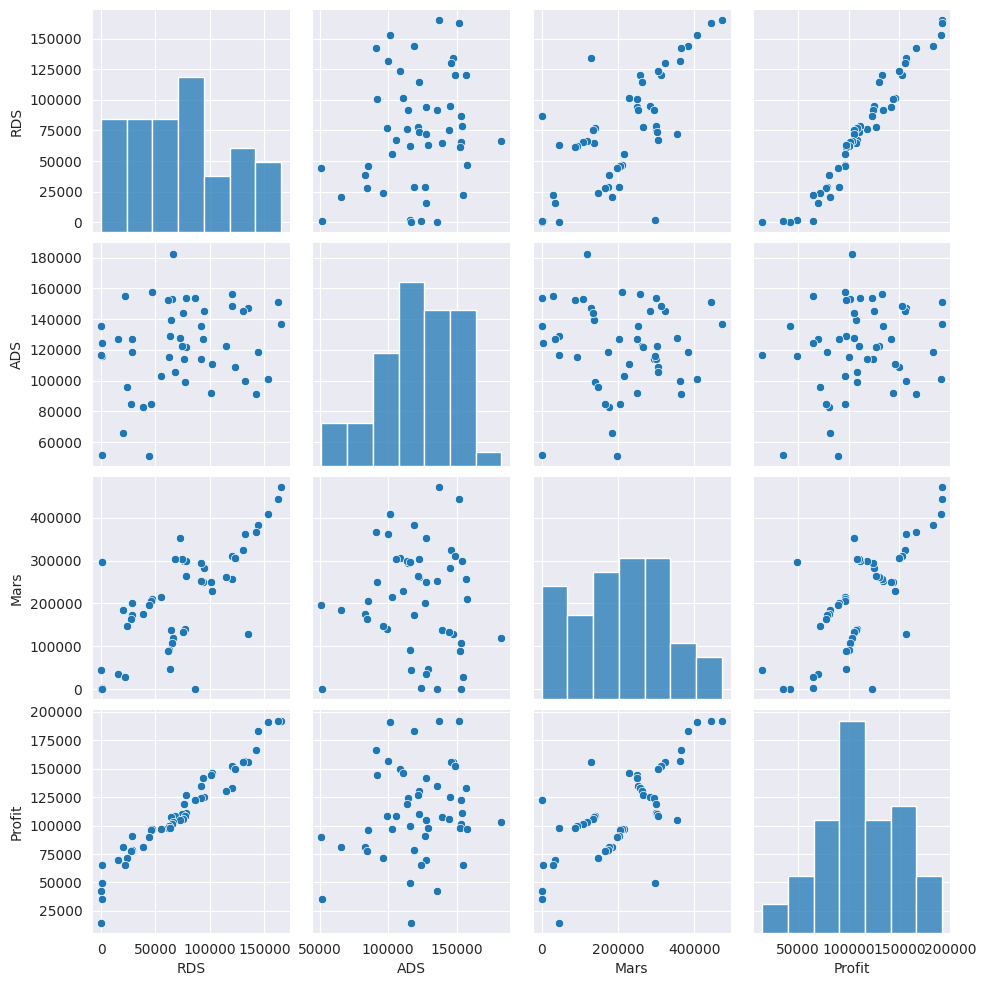

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [ ]:
model=smf.ols("Profit~RDS+ADS+Mars",data=data1).fit()

In [ ]:
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
Mars             0.027228
dtype: float64

In [ ]:
model.pvalues
np.round(model.pvalues,5)

Intercept    0.00000
RDS          0.00000
ADS          0.60176
Mars         0.10472
dtype: float64

In [ ]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [ ]:
slr_set=smf.ols("Profit~ADS",data=data1).fit()
slr_set.tvalues,slr_set.pvalues

(Intercept    3.040044
 ADS          1.419493
 dtype: float64,
 Intercept    0.003824
 ADS          0.162217
 dtype: float64)

In [ ]:
slr_set2=smf.ols("Profit~Mars",data=data1).fit()
slr_set2.tvalues,slr_set2.pvalues

(Intercept    7.808356
 Mars         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mars         4.381073e-10
 dtype: float64)

In [ ]:
mlr_set=smf.ols('Profit~ADS+Mars',data=data1).fit()
mlr_set.tvalues,mlr_set.pvalues

(Intercept    1.142741
 ADS          2.467779
 Mars         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADS          1.729198e-02
 Mars         9.727245e-11
 dtype: float64)

### Model Validation

In [ ]:
#1)checking for coolinearity problem

rsq_r=smf.ols("RDS~ADS+Mars",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols("ADS~RDS+Mars",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols("Mars~ADS+RDS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

#Putting the values in dataframe format
d1={'Variables':['RDS','ADS','Mars'],'Vif':[vif_a,vif_m,vif_r]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,1.175091
1,ADS,2.326773
2,Mars,2.468903


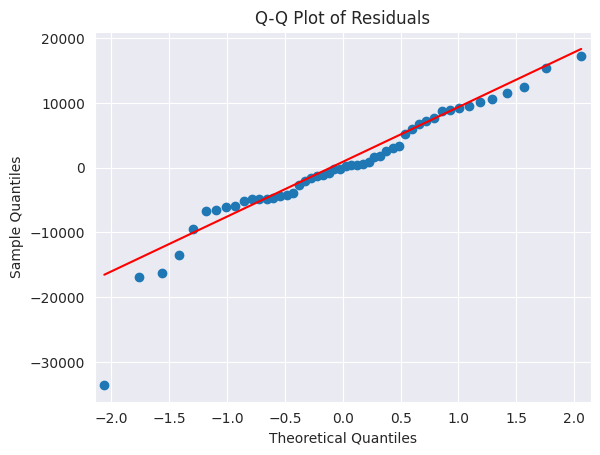

In [ ]:
#Residual Analysis  to check normality using Q-Qplot
sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
list(np.where(model.resid<-30000))

[array([49])]

In [ ]:
def standard_values(vals): return  (vals-vals.mean())/vals.std()

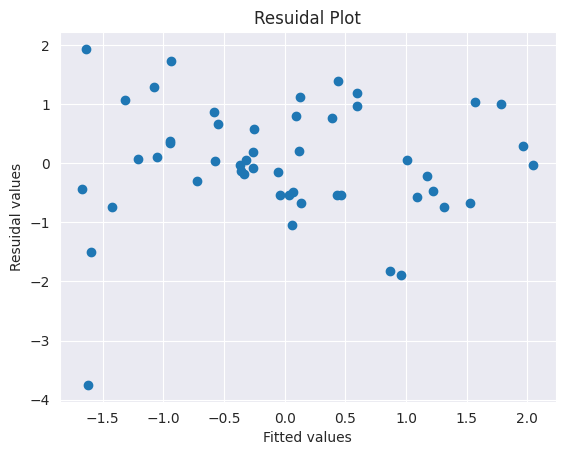

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Resuidal Plot")
plt.xlabel("Fitted values")
plt.ylabel("Resuidal values")
plt.show()

eval_env: 1


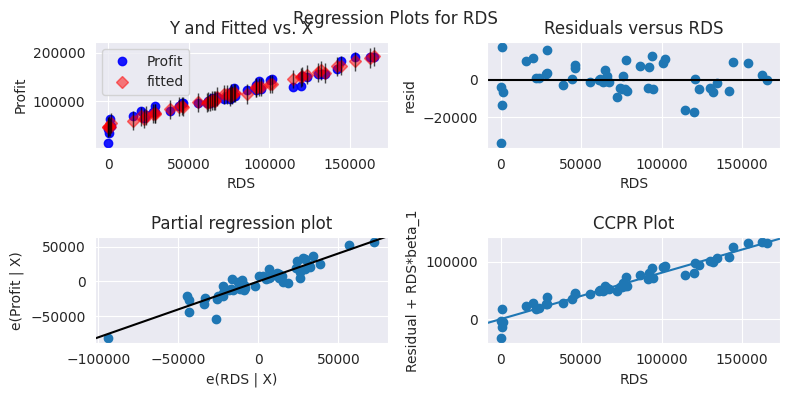

In [ ]:
fig=plt.figure(figsize=(8,4))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


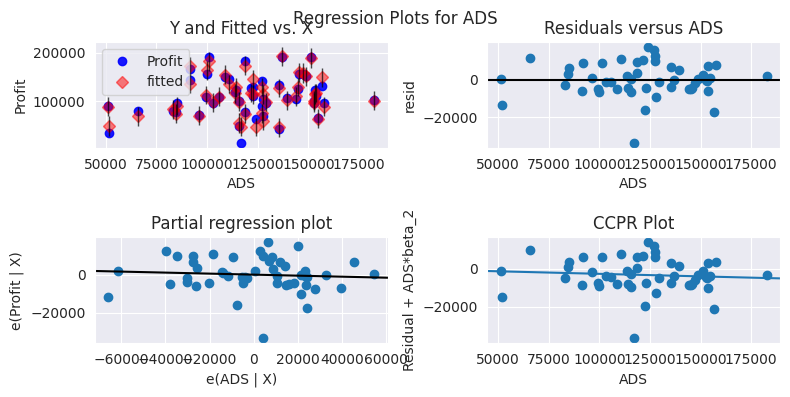

In [ ]:
fig=plt.figure(figsize=(8,4))
sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

eval_env: 1


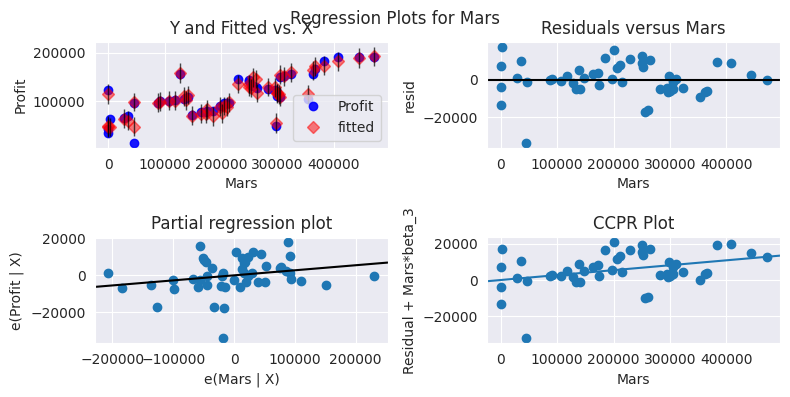

In [ ]:
fig=plt.figure(figsize=(8,4))
sm.graphics.plot_regress_exog(model,'Mars',fig=fig)
plt.show()

Checking Outliers

In [ ]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

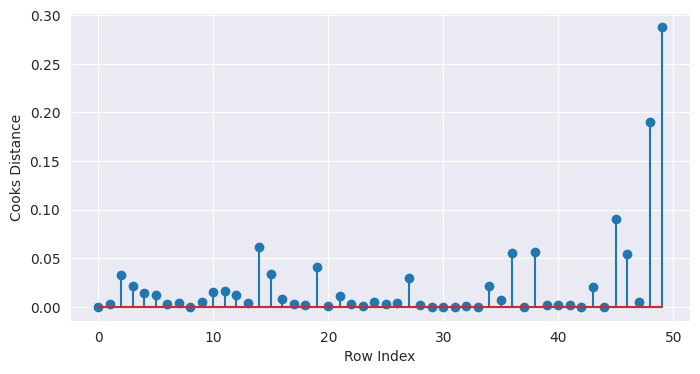

In [ ]:
fig=plt.figure(figsize=(8,4))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [ ]:
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

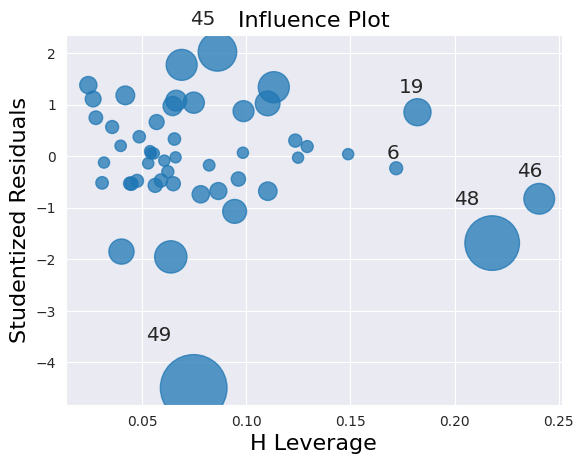

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.36

In [ ]:
data1[data1.index.isin([49])]

,RDS,ADS,Mars,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Model Improving

In [ ]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head(10)

,RDS,ADS,Mars,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Final Model

In [ ]:
while np.max(c)>0.5:
  model=smf.ols("Profit~RDS+ADS+Mars",data=data2).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  data2
else:
  final_model=smf.ols("Profit~RDS+ADS+Mars",data=data2).fit()
  final_model.rsquared ,final_model.aic
  print("The model accuracy is improved to : ",final_model.rsquared)

The model accuracy is improved to :  0.9613162435129847


In [ ]:
data2.head(10)

,RDS,ADS,Mars,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Model  Predictions

In [ ]:
new_data=pd.DataFrame({'RDS':70000,'ADS':900000,'Mars':140000},index=[0])
new_data

,RDS,ADS,Mars
0,70000,900000,140000


In [ ]:
final_model.predict(new_data)

0    90744.048423
dtype: float64

In [ ]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [ ]:
d2={'prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
